<a href="https://colab.research.google.com/github/katyreena/MAI/blob/main/AI/Homework_2022/LR_4/LW_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ТЗ к Лабораторной работе №4:

1. Найти оптимум функциии с помощью Optuna
2. Осуществить подбор параметров модели классификации с помощью Optuna

#0. Импорт библиотек и вспомогательные функции

In [1]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 348 kB 19.1 MB/s 
     |████████████████████████████████| 210 kB 67.9 MB/s 
     |████████████████████████████████| 81 kB 10.3 MB/s 
     |████████████████████████████████| 78 kB 8.4 MB/s 
     |████████████████████████████████| 50 kB 6.9 MB/s 
     |████████████████████████████████| 147 kB 68.1 MB/s 
     |████████████████████████████████| 112 kB 57.8 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=8f0d6acfeca7b87ca0532c59f79cdbafe5411e1fea97b0419fc29e4c9dc7916c
  Stored in directory: /root/.cache/pip/wheels/7f/1a/65/84ff8c386bec21fca6d220ea1f5498a0367883a78dd5ba6122
Successfully built pyperclip
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 5.1.0
    Uninstalling importlib-metadata-5.1.0:
      Successfully uninstalled importlib-metadata-5.1.0


In [2]:
import logging
import sys
import math
import optuna
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors as cm
from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from optuna.visualization import plot_contour
from optuna.visualization import plot_edf
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_slice

In [3]:
def my_plot_function(f, title: str, _x, _y, _z):
  x = np.linspace(-10, 10, 20) 
  y = np.linspace(-10, 10, 20) 
  X, Y = np.meshgrid(x, y)
  Z = f(X, Y)
  fig = plt.figure(figsize=(14, 10))
  ax = plt.axes(projection ='3d') 
  ax.plot_wireframe(X, Y, Z, rstride=1, cstride=1, alpha = 0.8)
  ax.scatter(_x, _y, _z, linewidths  = 8 , color='m', alpha = 1,
             label = 'Глобальный минимум')
  ax.legend(fontsize=10, loc='lower left' )
  ax.view_init(40, 45)
  ax.set_xlabel('x', fontsize=16)
  ax.set_ylabel('y', fontsize=16)
  ax.set_zlabel('z', fontsize=16)
  ax.set_title(title, fontsize=20)

#1. Поиск оптимумов функциий Матьяса и трехгорбого верблюда с помощью Optuna

In [4]:
def Matias(x: np.array, y:np.array) -> np.float128:
  return 0.26*(x*x + y*y) - 0.48*x*y
  
def Camel(x: np.array, y:np.array) -> np.float64:
  return 2 * x ** 2 - 1.05 * x ** 4 + 1/6 * x ** 6 + x * y + y ** 2

In [11]:
def objective_Matias(trial):
  x = trial.suggest_float("x", -10, 10)
  y = trial.suggest_float("y", -10, 10)
  return Matias(x, y)
study = optuna.create_study()
study.optimize(objective_Matias, n_trials = 200)
best_params = study.best_params
found_x = best_params["x"]
found_y = best_params["y"]
optuna.logging.disable_propagation()

Результат работы Opruna для поиска оптимума функции Матьяса: x, y, z =  0.020165619525392142 0.020165619525392142 1.6266088433715073e-05 
Абсолютная погрешность вычислений: [ x = 0.020165619525392142 ; y = 0.04644034427123016 ; z = 1.6266088433715073e-05 ]


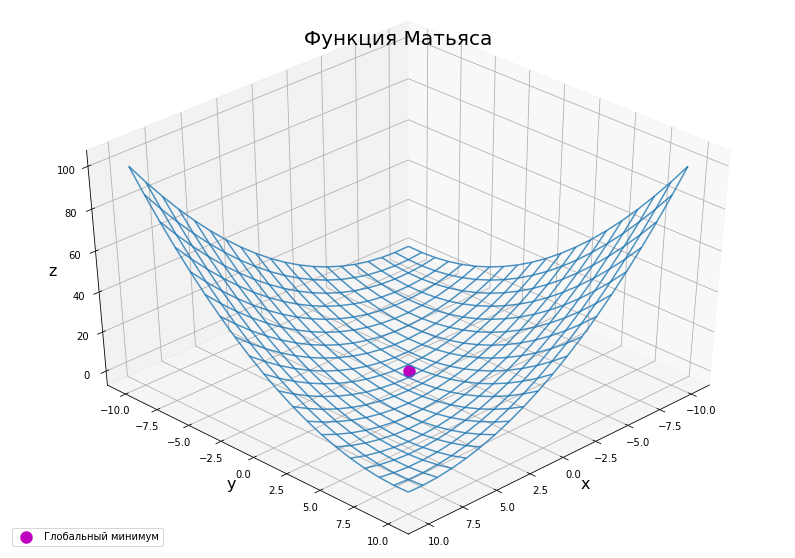

In [12]:
found_z = Matias(found_x, found_x)
print("Результат работы Opruna для поиска оптимума функции Матьяса: x, y, z = ",
      found_x, found_x, found_z, "\nАбсолютная погрешность вычислений: [ x =",
      abs((found_x - 0)), "; y =", abs((found_y - 0)), "; z =", abs((found_z - 0)), "]")
my_plot_function(Matias, "Функция Матьяса", found_x, found_y, found_z )

In [13]:
def objective_Camel(trial):
  x = trial.suggest_float("x", -10, 10)
  y = trial.suggest_float("y", -10, 10)
  return Camel(x, y)
study = optuna.create_study()
study.optimize(objective_Camel, n_trials = 200)
best_params = study.best_params
found_x = best_params["x"]
found_y = best_params["y"]
optuna.logging.disable_propagation()

Результат работы Opruna для поиска оптимума функции трехгорбого верблюда: x, y, z =  -0.07518672700986317 0.053391520431498 0.010108883977717774 
Абсолютная погрешность вычислений: [ x = 0.07518672700986317 ; y = 0.053391520431498 ; z = 1.6266088433715073e-05 ]


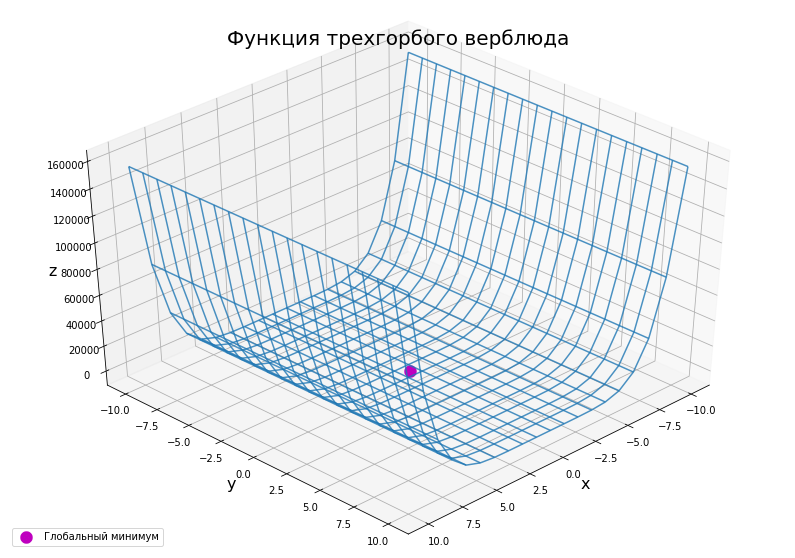

In [15]:
print("Результат работы Opruna для поиска оптимума функции трехгорбого верблюда: x, y, z = ",
      found_x, found_y, Camel(found_x, found_y), "\nАбсолютная погрешность вычислений: [ x =",
      abs((found_x - 0)), "; y =", abs((found_y - 0)), "; z =", abs((found_z - 0)), "]")
my_plot_function(Camel, "Функция трехгорбого верблюда", found_x, found_y, found_z)

#2. Подбор параметров модели классификации LogisticRegression с помощью Optuna на датасете sklearn.datasets.load_wine

In [25]:
X, y = load_wine(return_X_y=True)
train_x, valid_x, train_y, valid_y = train_test_split(X, y)

def objective(trial):
  C = trial.suggest_float("C", 1e-5, 1, log=True)
  tol = trial.suggest_float("tol", 1e-1, 10, log=True)
  solver = trial.suggest_categorical("solver", ["newton-cg", "lbfgs", "liblinear",
                                                "sag", "saga"])
  clf = LogisticRegression(C=C, tol=tol, solver=solver)
  for step in range(100):
    clf.fit(train_x, train_y)
    intermediate_value = clf.score(valid_x, valid_y)
    trial.report(intermediate_value, step=step)
    if trial.should_prune():
      raise optuna.TrialPruned()
    return clf.score(valid_x, valid_y)

optuna.logging.get_logger("optuna").addHandler(logging.StreamHandler(sys.stdout))
study = optuna.create_study(pruner=optuna.pruners.MedianPruner(n_warmup_steps=10))
study.optimize(objective, n_trials=30)

A new study created in memory with name: no-name-c9bb1c6b-360e-43d2-9774-957cbcf5e8ee
A new study created in memory with name: no-name-c9bb1c6b-360e-43d2-9774-957cbcf5e8ee
A new study created in memory with name: no-name-c9bb1c6b-360e-43d2-9774-957cbcf5e8ee
A new study created in memory with name: no-name-c9bb1c6b-360e-43d2-9774-957cbcf5e8ee
A new study created in memory with name: no-name-c9bb1c6b-360e-43d2-9774-957cbcf5e8ee
A new study created in memory with name: no-name-c9bb1c6b-360e-43d2-9774-957cbcf5e8ee
A new study created in memory with name: no-name-c9bb1c6b-360e-43d2-9774-957cbcf5e8ee
Trial 0 finished with value: 0.4222222222222222 and parameters: {'C': 0.0011524482391813866, 'tol': 1.279507925988049, 'solver': 'sag'}. Best is trial 0 with value: 0.4222222222222222.
Trial 0 finished with value: 0.4222222222222222 and parameters: {'C': 0.0011524482391813866, 'tol': 1.279507925988049, 'solver': 'sag'}. Best is trial 0 with value: 0.4222222222222222.
Trial 0 finished with value:

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Trial 24 finished with value: 0.4222222222222222 and parameters: {'C': 0.006369733557255654, 'tol': 3.2239034365440644, 'solver': 'sag'}. Best is trial 16 with value: 0.26666666666666666.
Trial 24 finished with value: 0.4222222222222222 and parameters: {'C': 0.006369733557255654, 'tol': 3.2239034365440644, 'solver': 'sag'}. Best is trial 16 with value: 0.26666666666666666.
Trial 24 finished with value: 0.4222222222222222 and parameters: {'C': 0.006369733557255654, 'tol': 3.2239034365440644, 'solver': 'sag'}. Best is trial 16 with value: 0.26666666666666666.
Trial 24 finished with value: 0.4222222222222222 and parameters: {'C': 0.006369733557255654, 'tol': 3.2239034365440644, 'solver': 'sag'}. Best is trial 16 with value: 0.26666666666666666.
Trial 24 finished with value: 0.4222222222222222 and parameters: {'C': 0.006369733557255654, 'tol': 3.2239034365440644, 'solver': 'sag'}. Best is trial 16 with value: 0.26666666666666666.
Trial 24 finished with value: 0.4222222222222222 and paramet

In [26]:
plot_optimization_history(study)

In [27]:
plot_parallel_coordinate(study)

In [28]:
plot_param_importances(study)

In [29]:
plot_contour(study)

In [30]:
plot_slice(study)

In [31]:
plot_edf(study)